In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("LoansTrainingSet.csv")

In [3]:
df.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
5,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,Fully Paid,10208,Short Term,716.0,10+ years,Rent,41853.0,Business Loan,$561.52,13.2,NaN,4,1,2289,4671,1.0,0.0
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,6640.0,6 years,Rent,49225.0,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036,Short Term,NaN,5 years,Rent,NaN,Debt Consolidation,$386.36,17.7,NaN,7,0,11970,16579,0.0,0.0
9,0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,Fully Paid,2036,Short Term,733.0,NaN,Home Mortgage,55985.0,Debt Consolidation,$741.79,19.8,29.0,7,0,10926,15676,0.0,0.0


In [8]:
df.shape

(256984, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [20]:
df["Credit Score"].value_counts()

747.0     5669
740.0     5537
741.0     5499
746.0     5486
742.0     5219
          ... 
6070.0       3
5980.0       3
5910.0       3
5930.0       2
5860.0       1
Name: Credit Score, Length: 334, dtype: int64

In [6]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [7]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


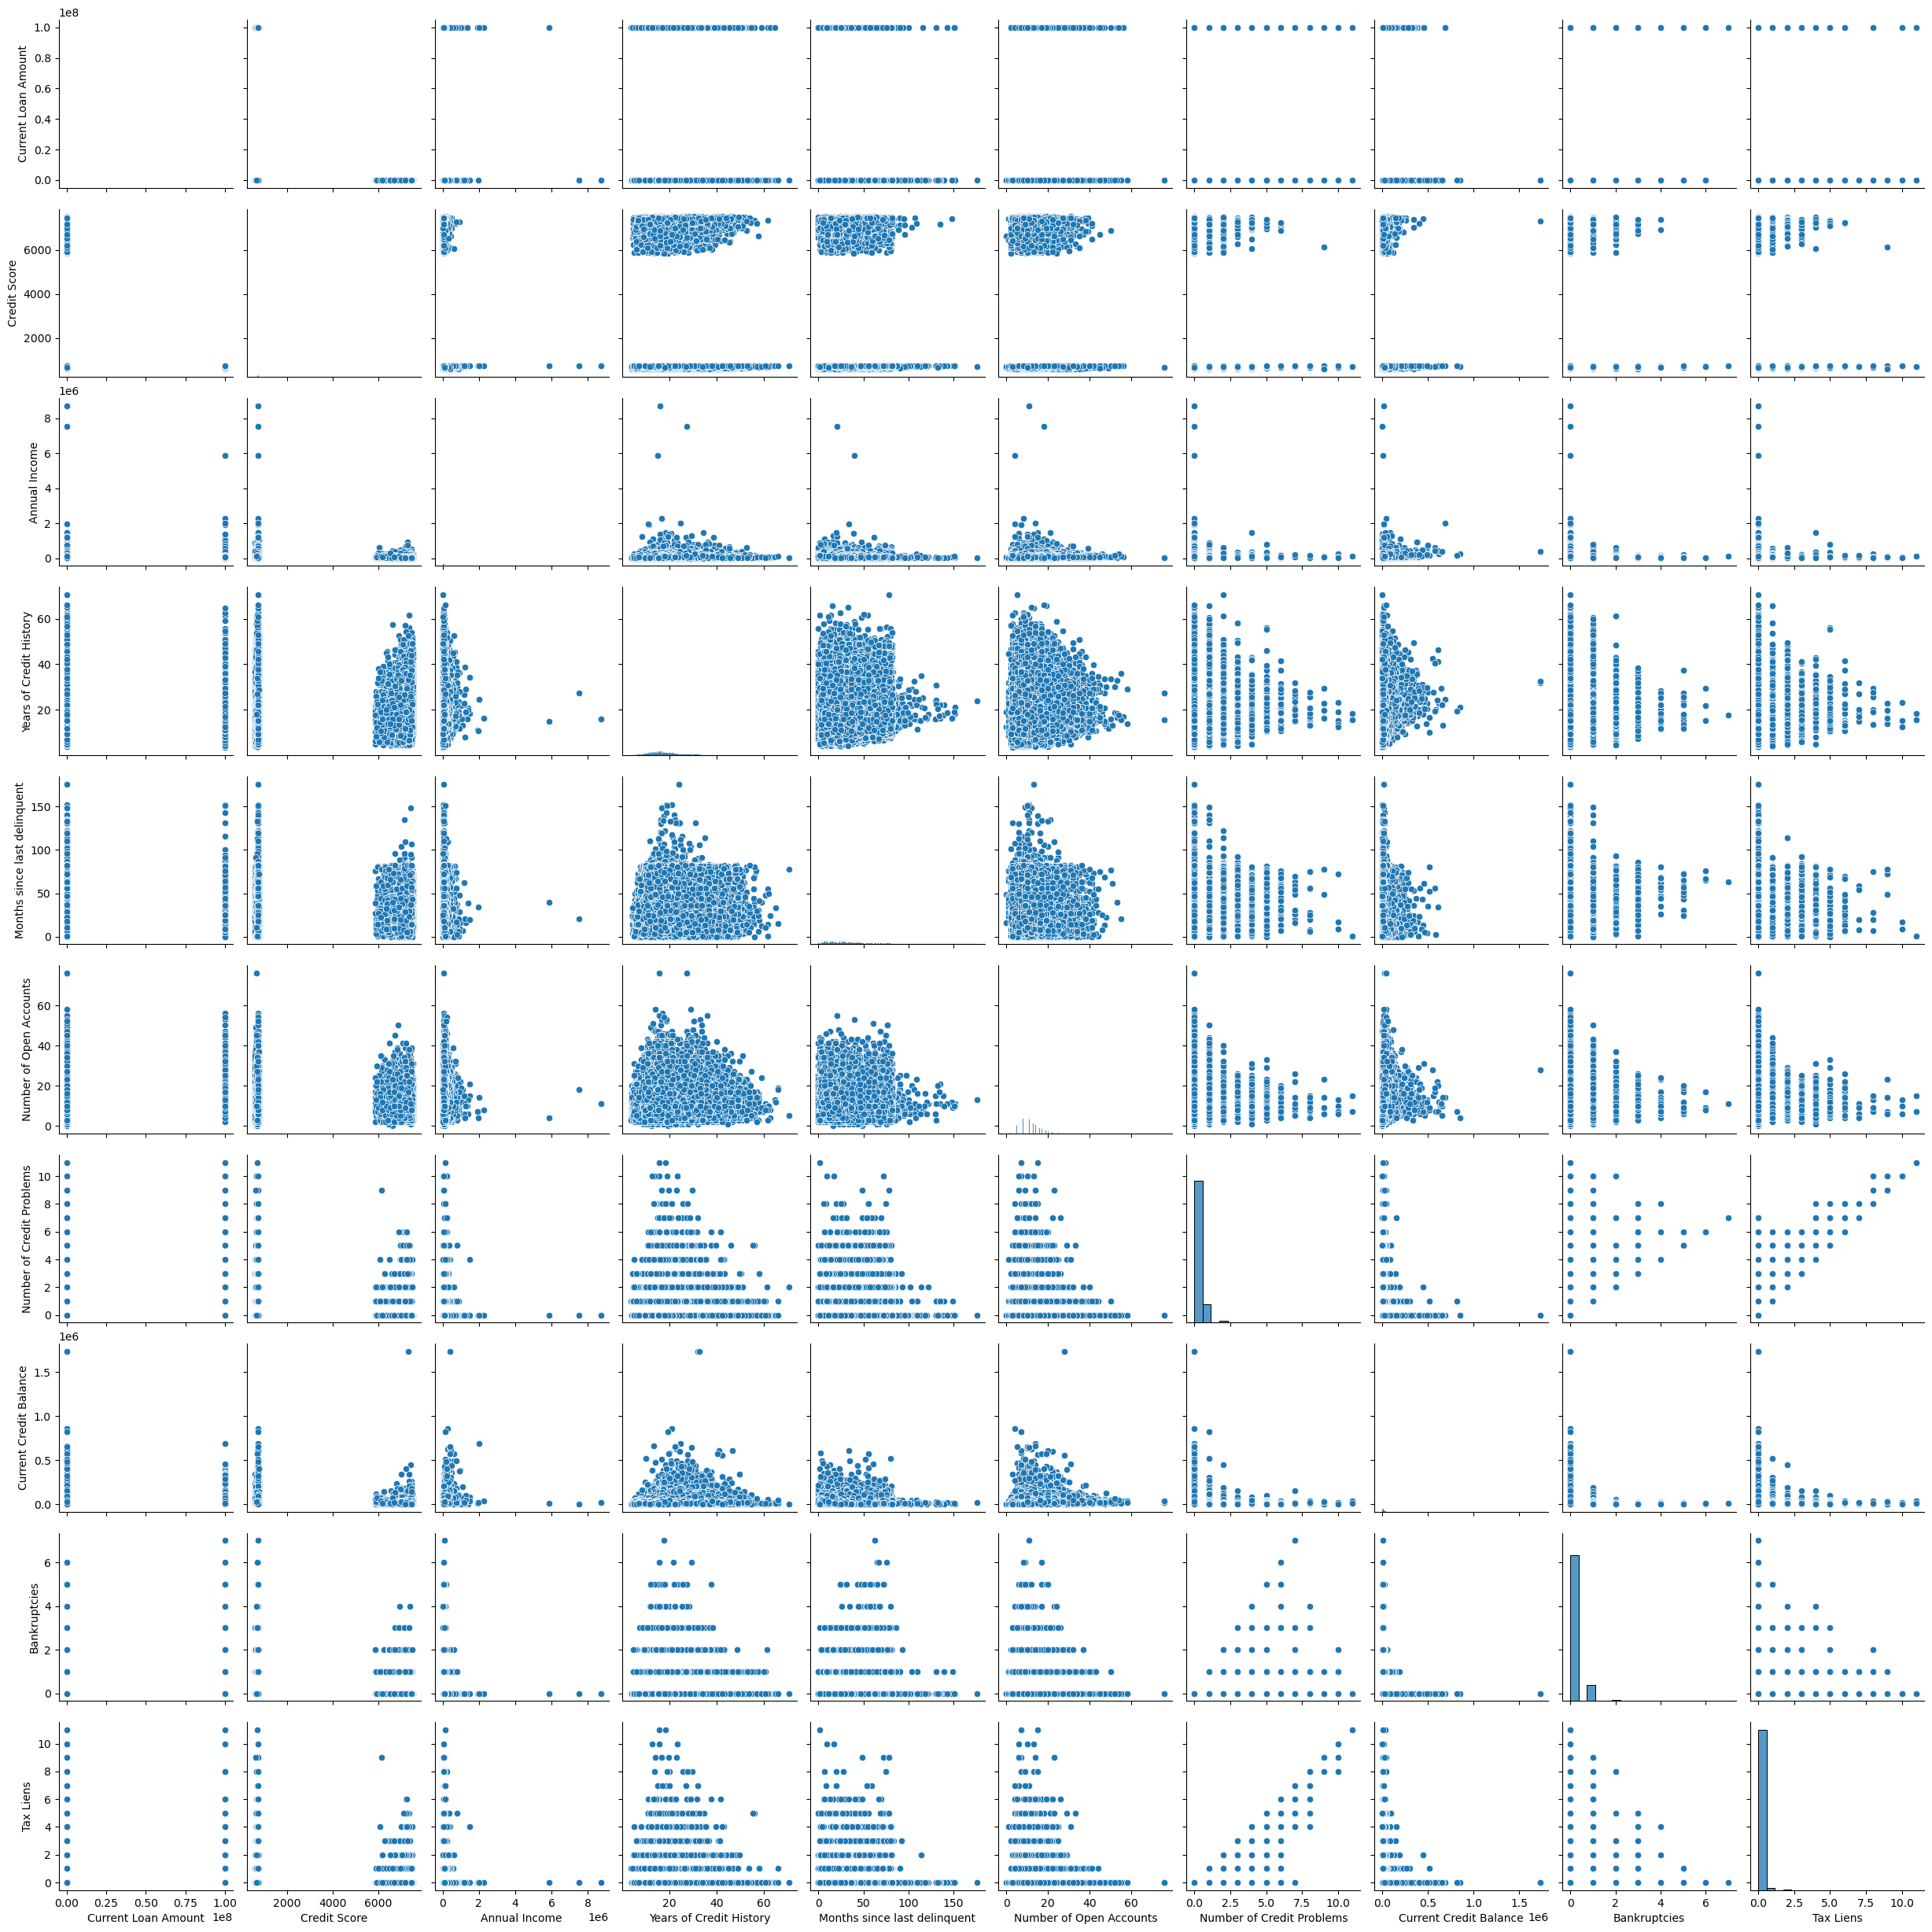

In [9]:
sns.pairplot(df)

In [14]:
df["Loan Status"].unique()
#ödenmiş ve ya ödenmemiş

array(['Fully Paid', 'Charged Off'], dtype=object)

In [16]:
df["Purpose"].unique() #amaç

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [17]:
df["Term"].unique()  #uzun ve kısa vadeli kredi

array(['Short Term', 'Long Term'], dtype=object)

In [21]:
df= df[df["Credit Score"] < 700]

In [22]:
df['Credit Score']=df['Credit Score'].fillna(df['Credit Score'].mean())

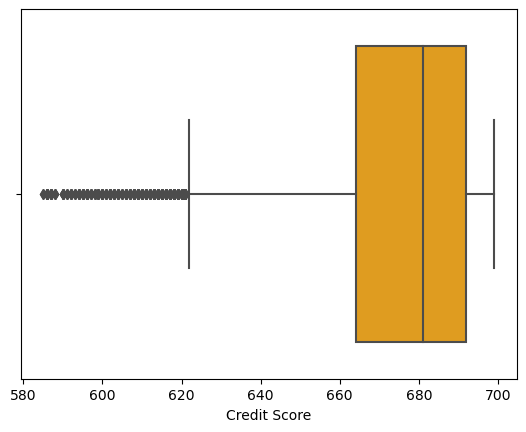

In [43]:
sns.boxplot(df['Credit Score'],color="orange");

In [24]:
df.drop(['Current Loan Amount'],axis=1,inplace=True)

In [25]:
df= df[df["Annual Income"] < 5.100e+04]

In [26]:
df=df[df["Years of Credit History"]<30]

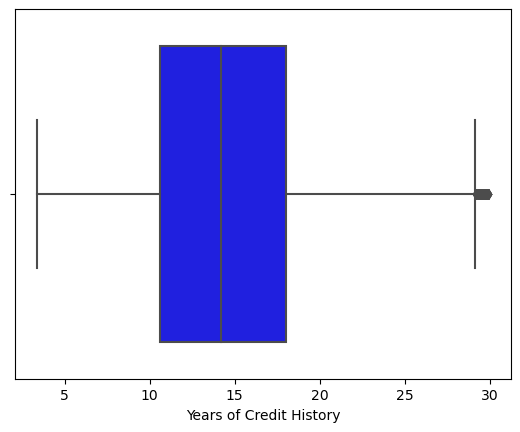

In [41]:
sns.boxplot(df['Years of Credit History'],color="b");

In [28]:
df['Months since last delinquent']=df['Months since last delinquent'].fillna(df['Months since last delinquent'].mean())

<AxesSubplot:xlabel='Months since last delinquent'>

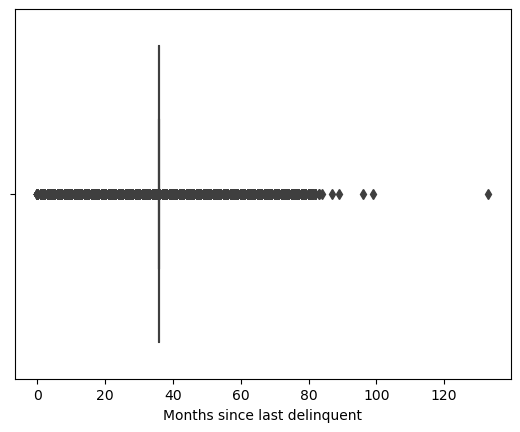

In [38]:
sns.boxplot(df['Months since last delinquent'])

<AxesSubplot:xlabel='Number of Open Accounts'>

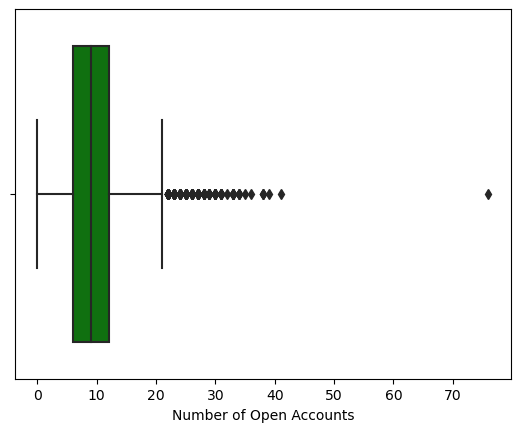

In [33]:
sns.boxplot(df['Number of Open Accounts'],color="g")

In [44]:
df= df[df["Number of Open Accounts"] <30]

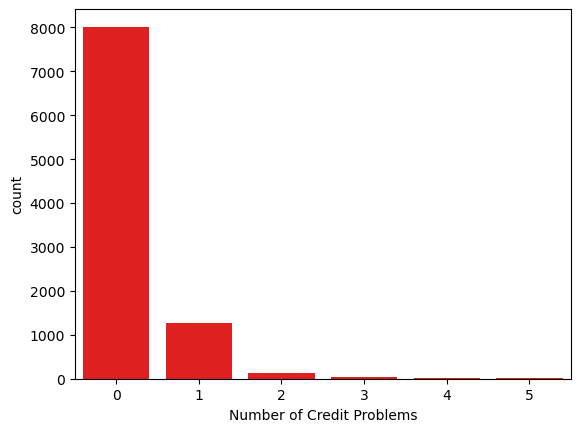

In [48]:
sns.countplot(df['Number of Credit Problems'],color="red");

In [49]:
df= df[df["Number of Credit Problems"] <3]

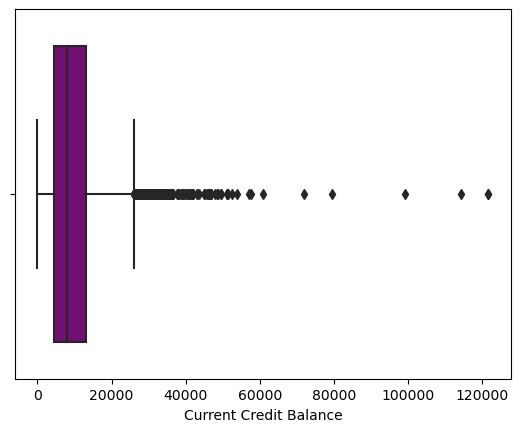

In [53]:
sns.boxplot(df['Current Credit Balance'],color="purple");

In [54]:
df=df[df['Current Credit Balance']<30000]

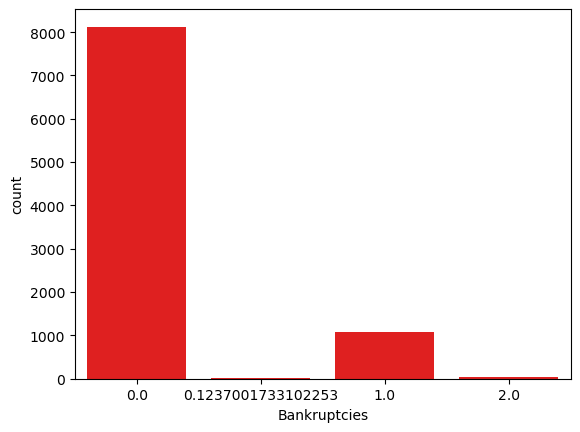

In [59]:
sns.countplot(df['Bankruptcies'],color="red");

In [56]:
df['Bankruptcies']=df['Bankruptcies'].fillna(df['Bankruptcies'].mean())

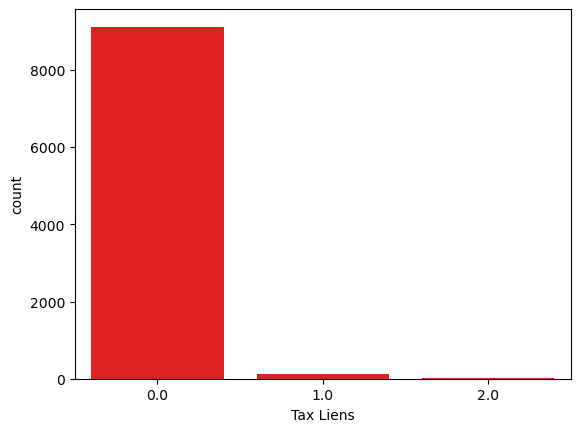

In [58]:
sns.countplot(df['Tax Liens'],color="red");

In [60]:
df=df[df['Tax Liens']==0]

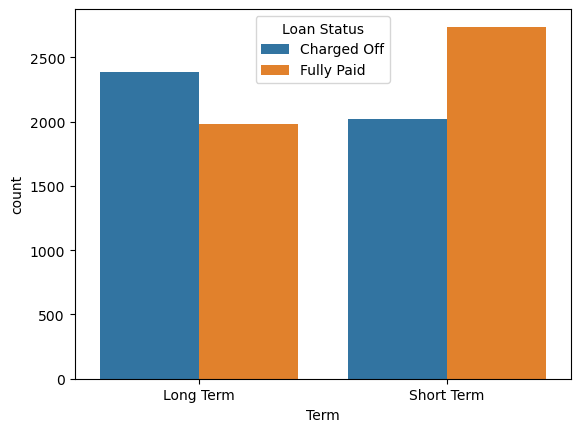

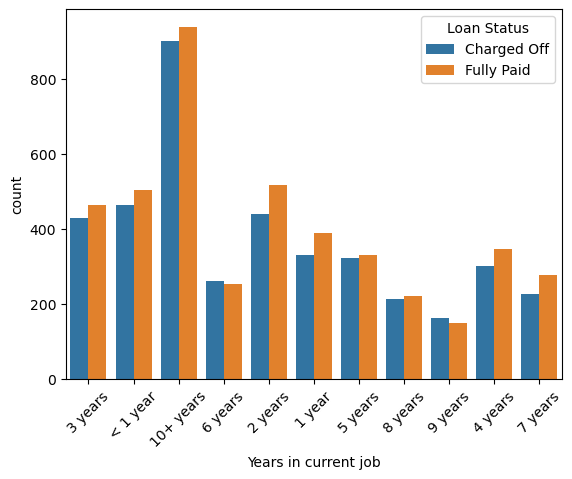

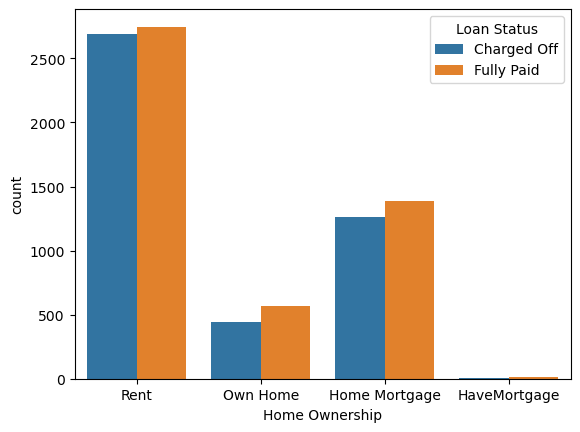

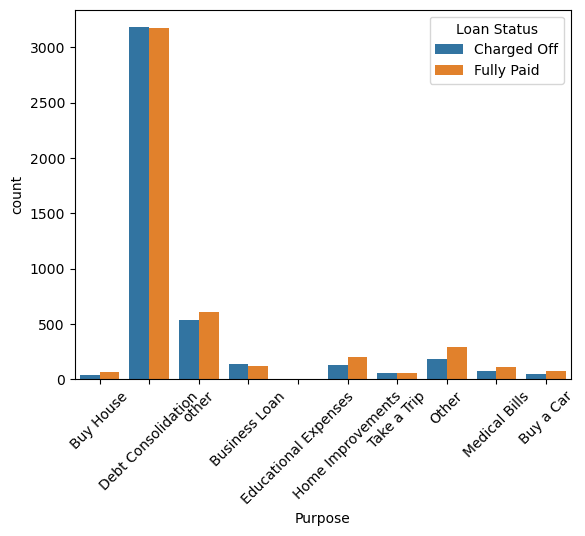

In [61]:
sns.countplot(x='Term', hue='Loan Status',data=df)
plt.show()

sns.countplot(x='Years in current job', hue='Loan Status',data=df)
plt.xticks(rotation=45);
plt.show()

sns.countplot(x='Home Ownership', hue='Loan Status',data=df)
plt.show()

sns.countplot(x='Purpose', hue='Loan Status',data=df)
plt.xticks(rotation=45);
plt.show()

In [62]:
df.isnull().sum()

Loan ID                           0
Customer ID                       0
Loan Status                       0
Term                              0
Credit Score                      0
Years in current job            692
Home Ownership                    0
Annual Income                     0
Purpose                           0
Monthly Debt                      0
Years of Credit History           0
Months since last delinquent      0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                      0
Tax Liens                         0
dtype: int64

In [63]:
x=df[["Term","Credit Score","Years in current job","Home Ownership","Annual Income","Purpose","Monthly Debt","Years of Credit History","Months since last delinquent","Number of Credit Problems","Current Credit Balance","Maximum Open Credit","Bankruptcies"]]

In [64]:
x.head()

,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies
36,Long Term,623.0,3 years,Rent,43846.0,Buy House,$738.08,16.2,55.000000,1,9031,17955,1.0
37,Long Term,623.0,3 years,Rent,43846.0,Buy House,$738.08,16.2,55.000000,1,9031,17955,1.0
68,Short Term,665.0,< 1 year,Rent,25000.0,Debt Consolidation,$148.96,8.0,35.897874,0,5393,5497,0.0
87,Short Term,699.0,10+ years,Rent,44087.0,Debt Consolidation,$852.34,17.3,53.000000,0,7617,15969,0.0
94,Short Term,675.0,NaN,Own Home,36549.0,Debt Consolidation,$444.68,14.2,35.897874,0,18193,21329,0.0


In [65]:
x=pd.get_dummies(x,drop_first=True)

In [66]:
x.head()

,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Credit Problems,Current Credit Balance,Bankruptcies,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,...,Maximum Open Credit_981,Maximum Open Credit_9833,Maximum Open Credit_9836,Maximum Open Credit_9872,Maximum Open Credit_9892,Maximum Open Credit_9896,Maximum Open Credit_9913,Maximum Open Credit_9926,Maximum Open Credit_9966,Maximum Open Credit_9996
36,623.0,43846.0,16.2,55.000000,1,9031,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,623.0,43846.0,16.2,55.000000,1,9031,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,665.0,25000.0,8.0,35.897874,0,5393,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
87,699.0,44087.0,17.3,53.000000,0,7617,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
94,675.0,36549.0,14.2,35.897874,0,18193,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y=df[['Loan Status']]

In [68]:
y=y.replace(['Charged Off','Fully Paid'],[0,1])

In [69]:
y.head()

,Loan Status
36,0
37,0
68,1
87,1
94,1


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=42)

In [71]:
x_train.shape, x_test.shape

((7294, 14783), (1824, 14783))

In [72]:
x_train

,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Credit Problems,Current Credit Balance,Bankruptcies,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,...,Maximum Open Credit_981,Maximum Open Credit_9833,Maximum Open Credit_9836,Maximum Open Credit_9872,Maximum Open Credit_9892,Maximum Open Credit_9896,Maximum Open Credit_9913,Maximum Open Credit_9926,Maximum Open Credit_9966,Maximum Open Credit_9996
199531,685.0,49850.0,10.3,28.000000,0,7281,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206746,699.0,50780.0,21.5,35.897874,0,8283,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
66034,659.0,30648.0,17.4,36.000000,0,13388,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146495,671.0,23811.0,9.8,35.897874,0,12426,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
201367,685.0,24565.0,17.3,35.897874,0,17503,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157745,680.0,24420.0,29.5,32.000000,0,9332,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142750,662.0,33490.0,10.0,35.897874,0,5693,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
147933,644.0,23654.0,9.1,35.897874,0,2631,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24189,679.0,42391.0,16.9,79.000000,0,18869,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
g=GaussianNB()
b=BernoulliNB()
k=KNeighborsClassifier()
l=LogisticRegression()

In [76]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [74]:
g.fit(x,y)

GaussianNB()

In [77]:
b.fit(x,y)

BernoulliNB()

In [78]:
tahmin1=g.predict(x)
tahmin2=b.predict(x)

In [80]:
accuracy_score(tahmin1,y)

0.5866418074139066

In [81]:
accuracy_score(tahmin2,y)

0.9929809168677342

In [82]:
precision_score(tahmin2,y)

0.9957600169599322

In [83]:
confusion_matrix(tahmin2,y)

array([[4357,   20],
       [  44, 4697]], dtype=int64)

In [84]:
confusion_matrix(tahmin2,y)

array([[4357,   20],
       [  44, 4697]], dtype=int64)

In [85]:
print(classification_report(tahmin1,y))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61      5268
           1       0.51      0.62      0.56      3850

    accuracy                           0.59      9118
   macro avg       0.59      0.59      0.59      9118
weighted avg       0.60      0.59      0.59      9118



In [86]:
print(classification_report(tahmin2,y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4377
           1       1.00      0.99      0.99      4741

    accuracy                           0.99      9118
   macro avg       0.99      0.99      0.99      9118
weighted avg       0.99      0.99      0.99      9118



In [87]:
k=KNeighborsClassifier()

In [88]:
k.fit(x,y)

KNeighborsClassifier()

In [89]:
tahmin3=k.predict(x)

In [90]:
print(classification_report(tahmin3,y))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      4483
           1       0.71      0.72      0.72      4635

    accuracy                           0.71      9118
   macro avg       0.71      0.71      0.71      9118
weighted avg       0.71      0.71      0.71      9118



In [91]:
confusion_matrix(tahmin3,y)

array([[3123, 1360],
       [1278, 3357]], dtype=int64)

In [92]:
l=LogisticRegression()

In [93]:
l.fit(x,y)

LogisticRegression()

In [94]:
tahmin4=l.predict(x)

In [95]:
print(classification_report(tahmin4,y))

              precision    recall  f1-score   support

           0       0.34      0.54      0.42      2777
           1       0.73      0.54      0.62      6341

    accuracy                           0.54      9118
   macro avg       0.54      0.54      0.52      9118
weighted avg       0.61      0.54      0.56      9118



In [96]:
confusion_matrix(tahmin4,y)

array([[1512, 1265],
       [2889, 3452]], dtype=int64)